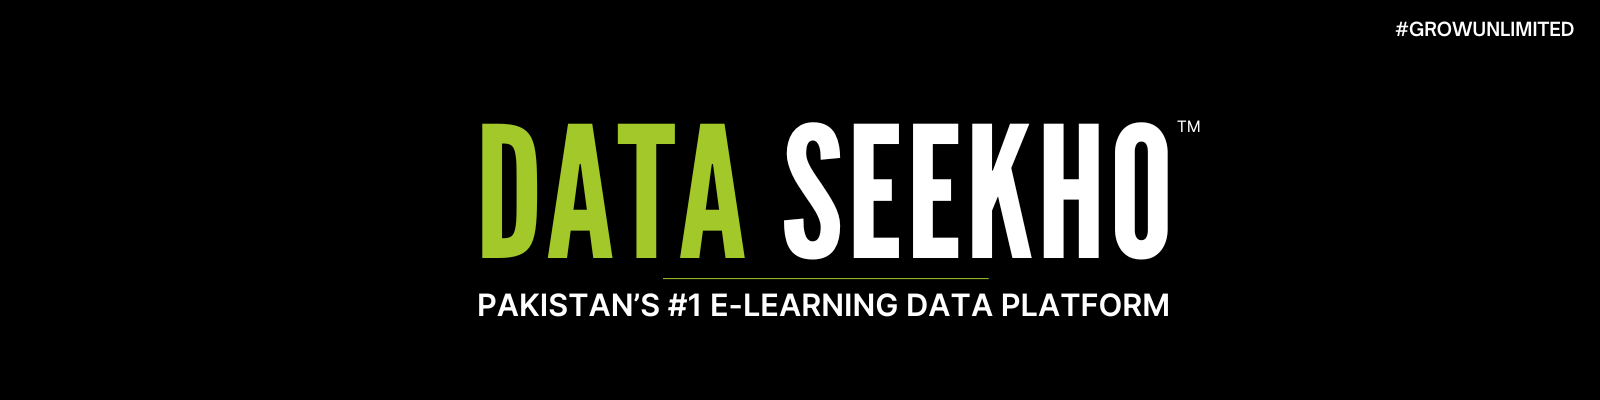

### Intermediate To Advanced-Level SQL Concepts

1. **JOINs**  
   JOINs are used to combine rows from two or more tables based on related columns.

   - **INNER JOIN**: Returns records where there is a match in both tables.
   - **LEFT JOIN**: Returns all records from the left table, and the matched records from the right table.
   - **RIGHT JOIN**: Returns all records from the right table, and the matched records from the left table.
   - **FULL JOIN**: Returns all records where there is a match in one of the tables.




2. **GROUP BY and HAVING Clauses**  
   - **GROUP BY** groups rows that have the same values into summary rows.
   - **HAVING** is used to filter groups based on aggregate functions (like `SUM`, `COUNT`).



3. **Subqueries**  
   A **subquery** is a query nested inside another query, often used to filter or aggregate data.



4. **CASE Statements**  
   The `CASE` statement is like an `IF` statement in SQL, allowing conditional results in a query.

5. **Common Table Expressions (CTEs)**  
   CTEs simplify complex queries by creating temporary tables that can be referenced in the main query.



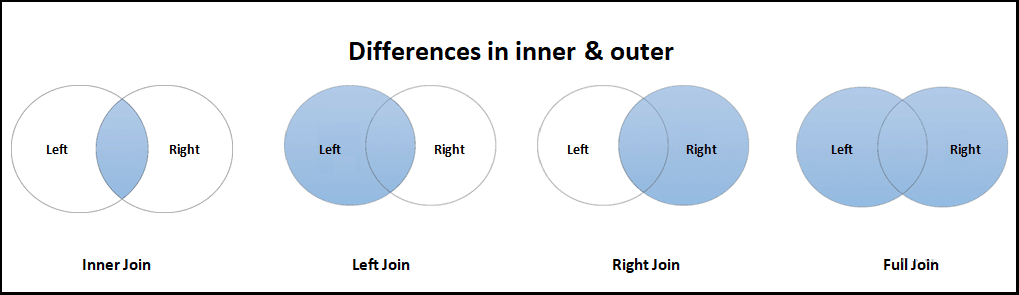



### 1. JOINs in SQL

**JOINs** are used to combine rows from two or more tables based on a related column between them. They are essential when data is spread across multiple tables. Here’s a closer look at each type of JOIN:

- **INNER JOIN**: Only returns records that have matching values in both tables.

  ```sql
  SELECT employees.name, departments.department_name
  FROM employees
  INNER JOIN departments
  ON employees.department_id = departments.department_id;
  ```
  *Explanation*: This query lists all employees along with their department names, but only if there is a matching department for each employee.

- **LEFT JOIN (LEFT OUTER JOIN)**: Returns all records from the left table and the matched records from the right table. If there’s no match, the result is NULL for columns from the right table.

  ```sql
  SELECT employees.name, departments.department_name
  FROM employees
  LEFT JOIN departments
  ON employees.department_id = departments.department_id;
  ```
  *Explanation*: This query shows all employees and their department names. If an employee doesn’t belong to any department, their department name will show as NULL.

- **RIGHT JOIN (RIGHT OUTER JOIN)**: Returns all records from the right table and the matched records from the left table. If there’s no match, the result is NULL for columns from the left table.

  ```sql
  SELECT employees.name, departments.department_name
  FROM employees
  RIGHT JOIN departments
  ON employees.department_id = departments.department_id;
  ```
  *Explanation*: This query lists all departments and employees who work in each department. If no employee is in a department, the employee’s name will be NULL.

- **FULL JOIN (FULL OUTER JOIN)**: Returns all records when there is a match in either table. If there is no match, NULLs are included for columns that don’t match.

  ```sql
  SELECT employees.name, departments.department_name
  FROM employees
  FULL JOIN departments
  ON employees.department_id = departments.department_id;
  ```
  *Explanation*: This query will show all employees and departments, including unmatched rows from both tables, with NULLs where there is no match.

---

### 2. GROUP BY and HAVING Clauses

- **GROUP BY**: Groups rows that have the same values in specified columns into summary rows, such as calculating totals or averages.

- **HAVING**: Filters data after grouping it, typically used with aggregate functions (SUM, COUNT, AVG, MIN, MAX) since WHERE cannot be used with aggregate functions.

  ```sql
  SELECT department_id, COUNT(*) AS employee_count
  FROM employees
  GROUP BY department_id
  HAVING COUNT(*) > 5;
  ```
  *Explanation*: This query counts the number of employees in each department and only shows departments with more than 5 employees.

**Use Cases for GROUP BY and HAVING**:
   - Counting the number of orders per customer.
   - Summing total sales per region.
   - Finding departments with employee counts above a certain threshold.

---

### 3. Subqueries

A **subquery** is a query nested inside another query. It allows you to use the result of one query as a condition for another, making it possible to perform complex operations.


   **Example**: Find employees who earn more than the average salary in their department.

   ```sql
   SELECT name, salary
   FROM employees
   WHERE salary > (
       SELECT AVG(salary)
       FROM employees
       WHERE department_id = employees.department_id
   );
   ```
   *Explanation*: For each employee, the subquery calculates the average salary in their department, and the outer query checks if their salary is higher than this average.

**Use Cases for Subqueries**:
   - Retrieving records that match specific criteria based on other records.
   - Creating temporary tables for advanced filtering.
   - Nesting queries to perform multi-step data analysis.

---

### 4. CASE Statements

The **CASE** statement allows conditional logic within SQL. It’s similar to an `IF` statement in programming languages and is useful for categorizing data or performing conditional calculations.

   **Example**: Categorize employees based on their salary levels.

   ```sql
   SELECT name, salary,
       CASE
           WHEN salary < 30000 THEN 'Low'
           WHEN salary BETWEEN 30000 AND 60000 THEN 'Medium'
           ELSE 'High'
       END AS salary_level
   FROM employees;
   ```
   *Explanation*: This query categorizes each employee’s salary as "Low," "Medium," or "High" based on the specified conditions.

**Common Uses of CASE**:
   - Calculating different tax rates based on income brackets.
   - Grouping data into ranges, like age groups.
   - Displaying different labels for data based on value conditions.

**Advanced CASE Use**:
   You can also nest CASE statements or use them in more complex calculations.

   ```sql
   SELECT product_name, sales_amount,
       CASE
           WHEN sales_amount > 1000 THEN sales_amount * 0.9
           ELSE sales_amount
       END AS discounted_price
   FROM sales;
   ```
   *Explanation*: This example applies a 10% discount for products with a sales amount over 1000.

---

### 5. Aggregate Functions (SUM, AVG, COUNT, MIN, MAX)

Aggregate functions perform calculations on a set of values and return a single result.

- **SUM()**: Calculates the total sum of a numeric column.
- **AVG()**: Returns the average value of a numeric column.
- **COUNT()**: Counts the number of rows or non-NULL values in a column.
- **MIN()**: Finds the minimum value in a column.
- **MAX()**: Finds the maximum value in a column.

   **Example**: Find the average salary of employees in each department.

   ```sql
   SELECT department_id, AVG(salary) AS average_salary
   FROM employees
   GROUP BY department_id;
   ```
   *Explanation*: This query calculates the average salary for each department.

**Advanced Use with Aggregate Functions**:
   You can combine aggregate functions with other SQL clauses like GROUP BY, HAVING, and JOIN for deeper insights.

   ```sql
   SELECT d.department_name, COUNT(e.employee_id) AS total_employees, AVG(e.salary) AS avg_salary
   FROM employees e
   JOIN departments d ON e.department_id = d.department_id
   GROUP BY d.department_name
   HAVING AVG(e.salary) > 50000;
   ```
   *Explanation*: This query lists departments with an average employee salary above $50,000, showing the total number of employees and average salary in each.

---

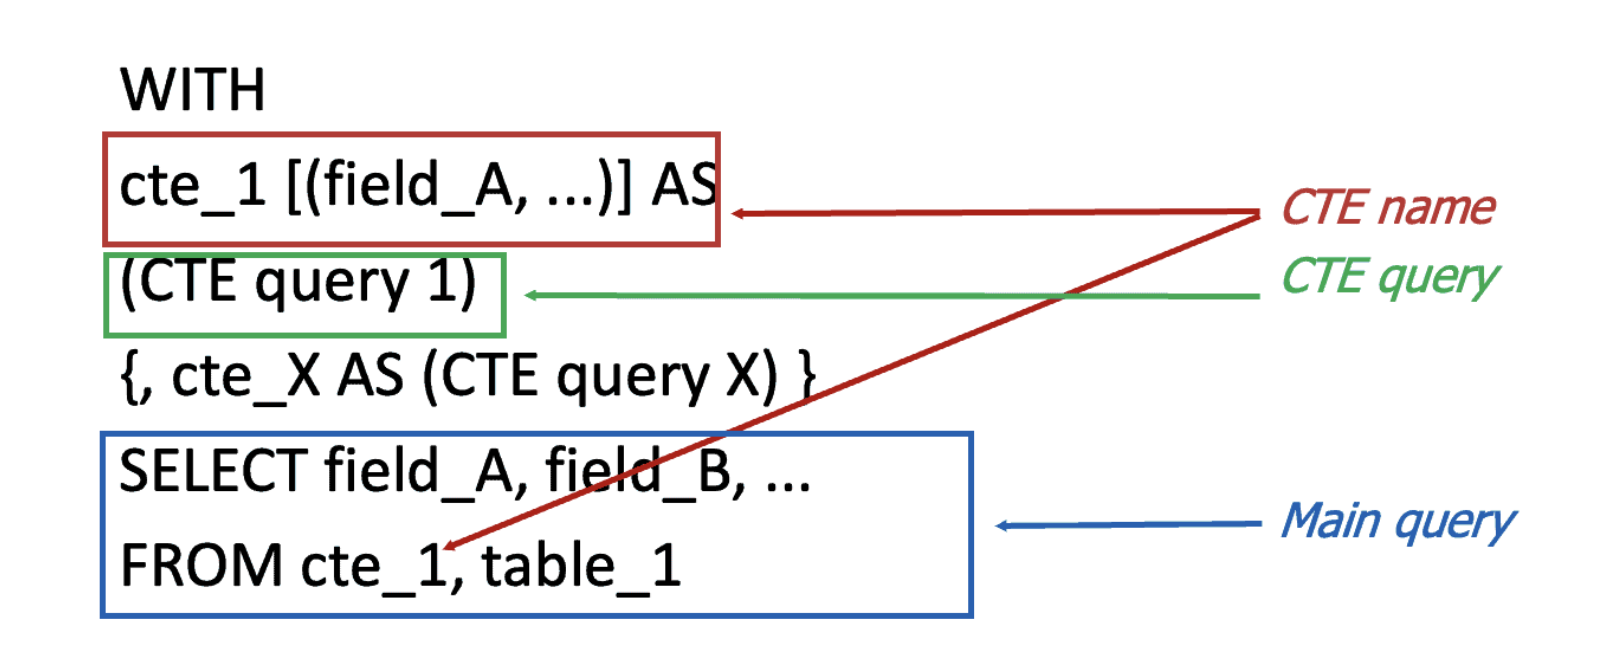


# 6. **Common Table Expressions (CTEs)**  
   CTEs simplify complex queries by creating temporary tables that can be referenced in the main query.

   **Example**: Using CTEs to calculate the average salary per department, then find employees who earn more than that average.
   ```sql
   WITH avg_salary AS (
       SELECT department_id, AVG(salary) AS dept_avg_salary
       FROM employees
       GROUP BY department_id
   )


   
   SELECT employees.name, employees.salary
   FROM employees
   JOIN avg_salary
   ON employees.department_id = avg_salary.department_id
   WHERE employees.salary > avg_salary.dept_avg_salary;
   ```